In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import linear_model
from sklearn import metrics

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
data = pd.read_csv('irisDataset.csv',names=columns)

In [3]:
data.head(5)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(data.groupby('tipo').size())

tipo
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


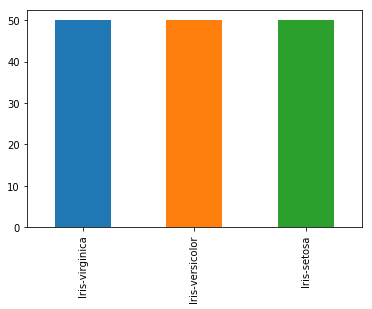

In [6]:
data['tipo'].value_counts().plot(kind='bar');

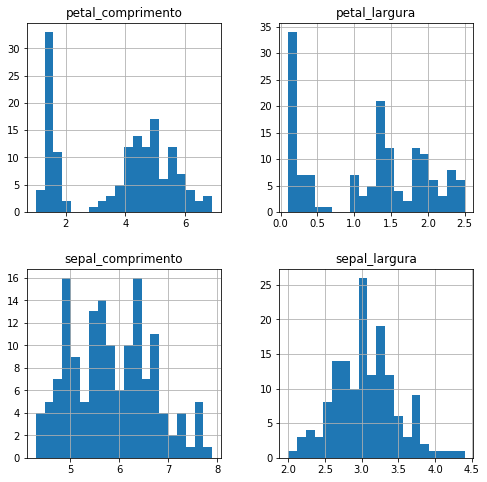

In [7]:
data.hist(bins=20, figsize=(8,8));

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

In [10]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [11]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [12]:
model = linear_model.LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

In [13]:
y_pred[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [14]:
y_test[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [15]:
model.classes_.tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
metrics.confusion_matrix(y_test, y_pred)

array([[44,  1,  0],
       [ 0, 41,  4],
       [ 0,  2, 43]])

In [17]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        45
Iris-versicolor       0.93      0.91      0.92        45
 Iris-virginica       0.91      0.96      0.93        45

      micro avg       0.95      0.95      0.95       135
      macro avg       0.95      0.95      0.95       135
   weighted avg       0.95      0.95      0.95       135



## ACC

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.9481481481481482

In [19]:
accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
print(accuracy)

0.9481481481481482


## Preci

In [20]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.9489039329464861

In [21]:
a=0
for c in range(cm.shape[0]):
    a = a + cm[c,c] / np.sum(cm[:, c])

print(a/3)

0.948903932946486


## Recall

In [22]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.9481481481481482

In [23]:
a=0
for l in range(cm.shape[0]):
    a = a + cm[l,l] / np.sum(cm[l, :])
    
print(a/3)

0.9481481481481482


## f1Score

In [24]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9482983227487379

## logloss

In [25]:
y_score = model.predict_proba(X_test_std)
metrics.log_loss(y_test, y_score)

0.30437519572019617

## AUC e Roc

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 1], pos_label='Iris-versicolor')
print('AUC', metrics.auc(fpr, tpr))

AUC 0.982716049382716


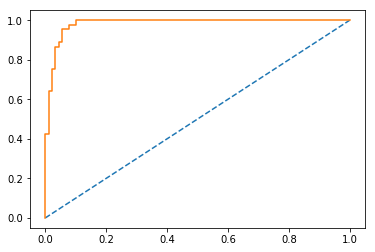

In [27]:
plt.plot([0, 1], [0, 1], '----')
plt.plot(fpr, tpr);

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 0], pos_label='Iris-setosa')
print('AUC', metrics.auc(fpr, tpr))

AUC 1.0


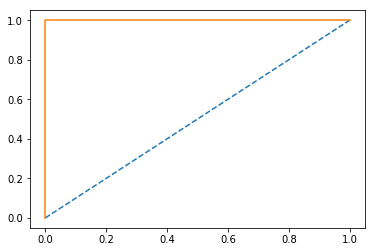

In [29]:
plt.plot([0, 1], [0, 1], '----')
plt.plot(fpr, tpr);

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 2], pos_label='Iris-virginica')
print('AUC', metrics.auc(fpr, tpr))

AUC 0.994074074074074


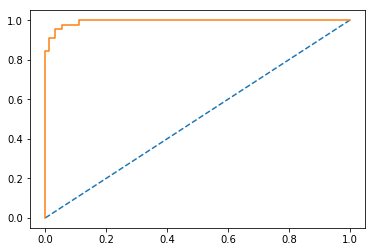

In [31]:
plt.plot([0, 1], [0, 1], '----')
plt.plot(fpr, tpr);